In [ ]:
#Aluno: Caio Ruiz Coldebella
#RA: 232621
import numpy as np

In [ ]:
from numpy.ma.core import ones
# h = delta(n) - 1/2 delta(n-1)
h = np.array(ones(5))
for i in range(0,5):
  h[i] = 1 - 0.5
w1 = np.array([1, 0.5, 0.5**2, 0.5**3, 0.5**4])
w2 = np.array([1, -0.75, 1.5, -0.2, 0.3])
g1 = np.convolve(h,w1,mode='valid')
g2 = np.convolve(h,w2,mode='valid')
np.set_printoptions(threshold=np.inf,linewidth=100)
print(g1)
print(g2)
#Tendo em vista a tarefa desejada na equalizacap, o filtro w1 parece equalizar melhor a entrada,
# visto que a sua convolucao na regiao valida foi um valor mais proximo de 1

[0.96875]
[0.925]


(array([25.,  0.,  0., 22.,  0.,  0., 30.,  0.,  0., 23.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <a list of 10 Patch objects>)

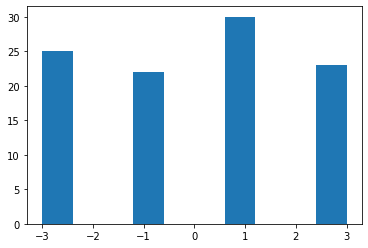

In [ ]:
import matplotlib.pyplot as plt
s = np.random.uniform(0,1,100)
s[np.where(s< 0.25)] = 3
s[np.where(s< 0.5)] = 1
s[np.where(np.abs(s)< 0.75)] = -1
s[np.where(np.abs(s)< 1)] = -3
x = np.convolve(s,h,mode='same')
plt.hist(s)

(array([ 0.,  0.,  0.,  1.,  2.,  1.,  5.,  8., 23., 11., 13.,  9., 15.,  7.,  3.,  1.,  1.,  0.,
         0.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
          8,   9]),
 <a list of 19 Patch objects>)

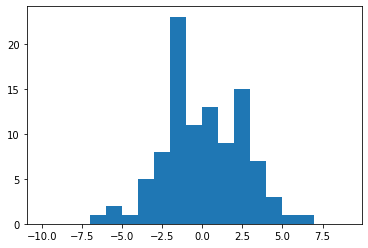

In [ ]:
plt.hist(x,range(-10,10))

Vemos que o sinal x[n] é uma distorção bastante forte de s[n], porém a maior parte dos valores de x[n] permanecem próximos aos valores de -1, 1, -3 e 3

100


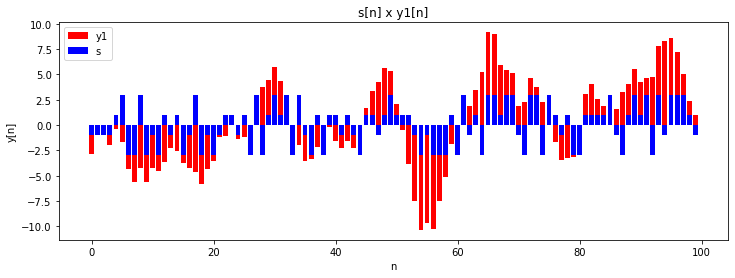

In [ ]:
y1 = np.convolve(x,w1,mode="same")
y2 = np.convolve(x,w2,mode="same")
print(np.size(y1))
xaxis = np.linspace(0,99,100)
plt.figure(figsize=(12,4))
plt.bar(xaxis,y1,color="red")
plt.bar(xaxis,s,color="blue")
plt.title("s[n] x y1[n]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.legend(["y1","s"])
plt.show()

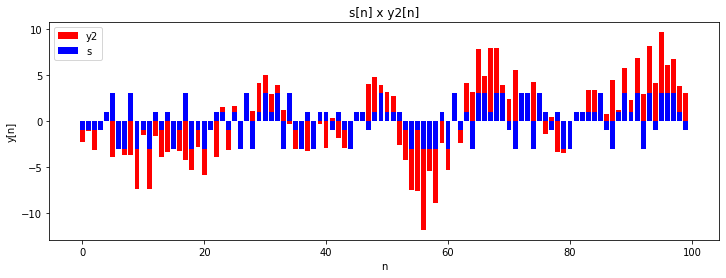

In [ ]:
plt.figure(figsize=(12,4))
plt.bar(xaxis,y2,color="red")
plt.bar(xaxis,s,color="blue")
plt.title("s[n] x y2[n]")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.legend(["y2","s"])
plt.show()

Vemos que, apesar de os valores de g1 e g2 terem se aproximado de 1,nenhuma das saídas se aproximou da entrada s[n] após primeiro convoluir s[n]x h[n] e depois convoluir x[n] x y1[n] ou x[n] x y2[n], isso se deve em parte ao fato das respostas ao impulso serem definidas para entradas infinitas, e neste experimento utilizamos entradas finitas